In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/z/.conda/envs/tf1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/z/.conda/envs/tf1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)


<div class='alert alert-info'>
<p>输入层：一个点(一个神经元)</p>
<p>中间层：10个神经元</p>
<p>输出层：一个点(一个神经元)</p>
</div>

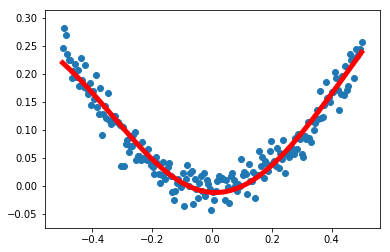

In [10]:
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

# 定义2个placeholder
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])

# 构建神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))# 1:输入层1个神经元，10：中间层10个神经元
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 构建输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
# 梯度下降
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        # 训练
        sess.run(train_step,feed_dict={x:x_data, y:y_data})
        
    # 获得预测值：
    predict_value = sess.run(prediction,feed_dict={x:x_data})
    
    # 画出数据
    plt.figure()
    # 散点图画x，y
    plt.scatter(x_data,y_data)
    # 曲线图，画x，y_predict_value
    plt.plot(x_data,predict_value,'r-',lw=5)
    plt.show()